<a href="https://colab.research.google.com/github/guptaaditi123/Fake-News-Detection/blob/main/Fake_News_Detection_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fake News Detection and Classification Code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re #regular expression for searching words
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,matthews_corrcoef
from sklearn.utils import shuffle
import nltk #Natural language processing
from sklearn.naive_bayes import MultinomialNB #naive bayes
from sklearn.svm import SVC #importing svm library
from sklearn.neighbors import KNeighborsClassifier #importing knn library
import string
import math
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

Data Pre-processing

In [ ]:
#Uploading data
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [ ]:
# Printing first 5 rows
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# Printing first 5 rows
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#Printing last 5 row
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
#Printing last 5 row
fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [ ]:
#Number of rows and columns in true data
true.shape

(21417, 4)

In [ ]:
#Number of rows and columns in fake data
fake.shape

(23481, 4)

In [ ]:
#Getting information
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
#Getting information
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
#Checking missing values in true data
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
#Checking missing values in fake data
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
#Stastical measure of true data
true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [ ]:
#Stastical measure of fake data
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [ ]:
true['Label']= 0
fake['Label']=1

In [ ]:
News_data = pd.concat([true, fake])
News_data.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
#Total no of rows in whole dataset
num_rows = len(News_data)

In [ ]:
num_rows

44898

In [ ]:
#Shuffling the data
News_data = shuffle(News_data)
News_data = News_data.reset_index(drop=True)

In [ ]:
News_data.head()

,title,text,subject,date,Label
0,WATCH: Justin Trudeau Has The PERFECT Respons...,Canadian Prime Minister Justin Trudeau partici...,News,"June 22, 2017",1
1,North Korean missiles will be able to reach U....,MOSCOW (Reuters) - North Korea s leadership ha...,worldnews,"October 10, 2017",0
2,Sean Hannity Has Extremely Embarrassing Meltd...,There are two things anyone with familiarity w...,News,"March 3, 2016",1
3,"Trump Just Went Back On Another Election Vow,...","In a shocking turn of events, the Trump admini...",News,"June 16, 2017",1
4,Russian helicopter missing off coast of Svalba...,OSLO (Reuters) - The Russian helicopter that w...,worldnews,"October 26, 2017",0


In [ ]:
#Number of 0's and 1's Label
News_data['Label'].value_counts()

1    23481
0    21417
Name: Label, dtype: int64

In [ ]:
#Here we will drop data as we do not need it
News_data=News_data.drop(['date'], axis=1)  # axis=1 to drop full column

In [ ]:
News_data.head()


,title,text,subject,Label
0,WATCH: Justin Trudeau Has The PERFECT Respons...,Canadian Prime Minister Justin Trudeau partici...,News,1
1,North Korean missiles will be able to reach U....,MOSCOW (Reuters) - North Korea s leadership ha...,worldnews,0
2,Sean Hannity Has Extremely Embarrassing Meltd...,There are two things anyone with familiarity w...,News,1
3,"Trump Just Went Back On Another Election Vow,...","In a shocking turn of events, the Trump admini...",News,1
4,Russian helicopter missing off coast of Svalba...,OSLO (Reuters) - The Russian helicopter that w...,worldnews,0


In [ ]:
# merging the text  and news title
News_data['content'] = News_data['text']+' '+News_data['title']

In [ ]:
News_data=News_data.drop(['text','title'], axis=1)  # axis=1 to drop full column

In [ ]:
News_data.head()

,subject,Label,content
0,News,1,"After only 16 hours, Microsoft was forced to p..."
1,left-news,1,A video from 1985 was shown last night during ...
2,worldnews,0,ABUJA (Reuters) - Nigeria has canceled its wee...
3,US_News,1,21st Century Wire says Unless you have been li...
4,worldnews,0,VIENNA (Reuters) - The fallout from the Harvey...


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: content, dtype: int64


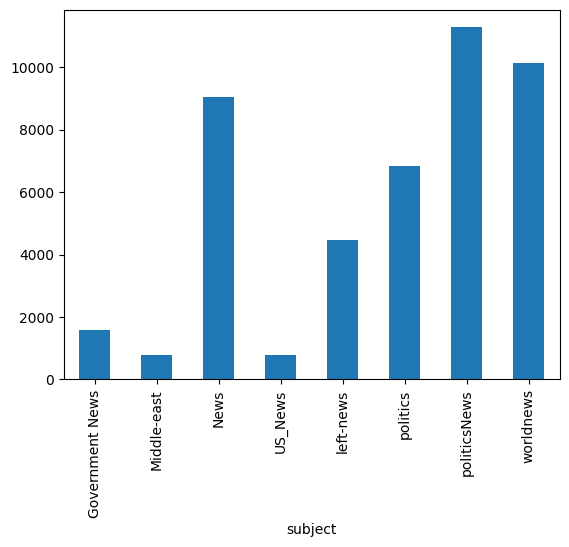

In [ ]:
print(News_data.groupby(['subject'])['content'].count())
News_data.groupby(['subject'])['content'].count().plot(kind ='bar')
plt.show()

Label
0    21417
1    23481
Name: content, dtype: int64


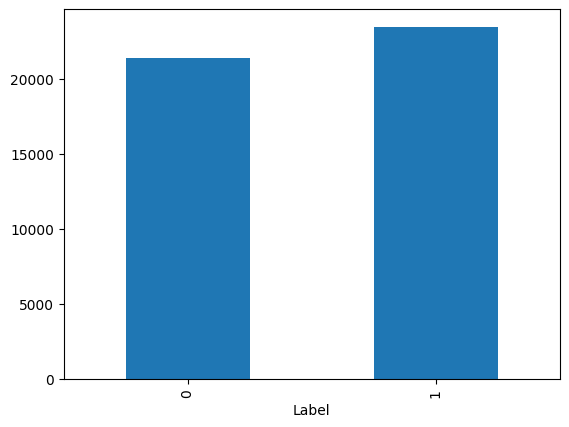

In [ ]:
print(News_data.groupby(['Label'])['content'].count())
News_data.groupby(['Label'])['content'].count().plot(kind ='bar')
plt.show()

In [ ]:
#Seperating the data & label
X = News_data.drop(columns='Label', axis=1)
Y = News_data['Label']
X

,subject,content
0,News,"Looking back at all of the offensive, ridiculo..."
1,Government News,The media continues to lie about jobs numbers ...
2,News,If you haven t heard about the ongoing battle ...
3,worldnews,WARSAW (Reuters) - Poland s ruling conservativ...
4,politicsNews,WASHINGTON (Reuters) - The U.S. Congress could...
...,...,...
44893,News,Republican front runner Donald Trump has revea...
44894,politicsNews,(Reuters) - Regular tourism to Cuba by U.S. ci...
44895,US_News,Randy Johnson 21st Century WireThe majority ...
44896,politicsNews,CLEVELAND (Reuters) - In an age of social medi...


In [ ]:
Y

0        1
1        0
2        1
3        1
4        0
        ..
44893    1
44894    1
44895    0
44896    1
44897    1
Name: Label, Length: 44898, dtype: int64

In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')
News_data['content'] = News_data['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# Remove punctuation
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

News_data['content'] = News_data['content'].apply(punctuation_removal)

In [ ]:
#Converting to lowercase the text
News_data['content'] = News_data['content'].apply(lambda x: x.lower())

In [ ]:
#Converting textual data to numerical for feature extraction
vectorizer = TfidfVectorizer()
X_vectorize= vectorizer.fit_transform(X)

In [ ]:
#Feature Selection
selector= SelectKBest(chi2, k=1000)
X_select = selector.fit_transform(X_vectorize,Y)

In [ ]:
selected_features= np.array(vectorizer.get_feature_names_out())[selector.get_support()]
print('Selected features:', selected_features)

Selected features: ['2017realdonaldtrump' '2017the' '2018' '2019' '21st' '21wire' '21wiretv'
 '911' 'abadi' 'abbas' 'abe' 'about' 'absolutely' 'accord' 'acr' 'actual'
 'actually' 'ad' 'added' 'adding' 'administration' 'adviser' 'afd'
 'afghan' 'afghanistan' 'africa' 'after' 'again' 'against' 'agency'
 'agreed' 'agreement' 'ahead' 'aid' 'aimed' 'air' 'aircraft' 'alex'
 'alien' 'aliens' 'all' 'allegations' 'alliance' 'allies' 'ally'
 'alternate' 'alzor' 'amazing' 'ambassador' 'america' 'american'
 'americans' 'amid' 'analysts' 'anc' 'and' 'angry' 'animals' 'ankara'
 'anonymity' 'answer' 'anticorruption' 'antifa' 'antitrump' 'anyone'
 'anything' 'apparently' 'appeals' 'appears' 'approved' 'arab' 'arabia'
 'are' 'areas' 'army' 'as' 'asia' 'ass' 'assange' 'assembly' 'at' 'aug'
 'australia' 'authorities' 'awesome' 'babis' 'baby' 'backed' 'bad'
 'baghdad' 'ballistic' 'baltimore' 'ban' 'bangladesh' 'bank' 'barcelona'
 'barnier' 'barzani' 'basically' 'be' 'because' 'beijing' 'being' 'beirut'
 '

`Decision Tree`

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_select ,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
model_1 = DecisionTreeClassifier()
model_1 = model_1.fit(X_train,Y_train)

In [ ]:
#Model Predict
#Accuracy on test data
X_test_prediction_1 = model_1.predict(X_test)
test_data_accuracy_1 = accuracy_score(X_test_prediction_1, Y_test)
print('Accuracy: ',test_data_accuracy_1)

Accuracy:  0.9963251670378619


In [ ]:
# Matthews Correlation Coefficient (MCC)
decesiontree_mcc = matthews_corrcoef(Y_test, X_test_prediction_1)

In [ ]:
decesiontree_mcc

0.9926352795007101

In [ ]:
X_new = X_test[2]
prediction = model_1.predict(X_new)
print(prediction)

if(prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [ ]:
cf_matrix_1 = confusion_matrix(Y_test, X_test_prediction_1)

print(cf_matrix_1)

[[4265   19]
 [  15 4681]]


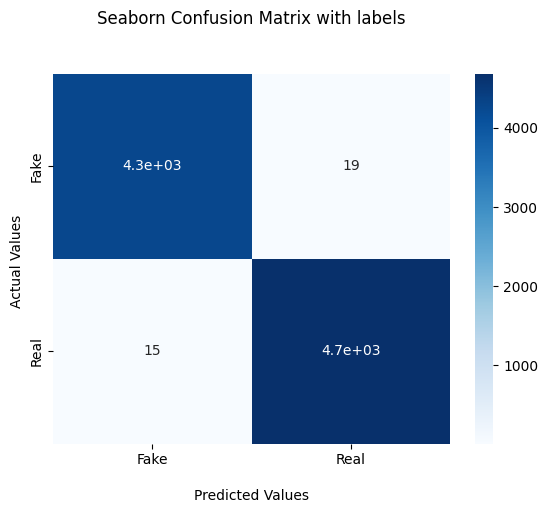

In [ ]:
ax = sns.heatmap(cf_matrix_1, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fake','Real'])
ax.yaxis.set_ticklabels(['Fake','Real'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
matrix_1 = classification_report(Y_test, X_test_prediction_1)
print(matrix_1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
# Calculate evaluation metrics
tn, fp, fn, tp = confusion_matrix(Y_test, X_test_prediction_1).ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
fnr = fn / (tp + fn)
precision = tp / (tp + fp)
f_measure = 2 * ((precision * tpr) / (precision + tpr))
accuracy = (tp + tn) / (tp + tn + fp + fn)
mcc = ((tp * tn) - (fp * fn)) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

In [ ]:
print('tpr : ',tpr)
print('fpr : ',fpr)
print('fnr : ',fnr)
print('precision: ',precision)
print('f_measure: ',f_measure)
print('accuracy: ',accuracy)
print('mcc: ',mcc)


tpr :  0.9968057921635435
fpr :  0.004435107376283847
fnr :  0.0031942078364565587
precision:  0.9959574468085106
f_measure:  0.9963814389101745
accuracy:  0.9962138084632517
mcc:  0.9924117285005182


SVM

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size=0.2, random_state=2)

In [ ]:
# Train the SVM classifier
model_2 = SVC(kernel='linear', C=1)
model_2.fit(X_train, Y_train)


SVC(C=1, kernel='linear')

In [ ]:
#Model Predict
# Accuracy of model on test data
X_test_prediction_2=model_2.predict(X_test)
test_data_accuracy_2=accuracy_score(X_test_prediction_2,Y_test)
print('Accuracy of Test Data : ',test_data_accuracy_2)

Accuracy of Test Data :  0.9897550111358575


In [ ]:
X_new = X_test[7]
prediction = model_2.predict(X_new)
print(prediction)

if(prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [ ]:
# Printing the confusion matrix
cf_matrix_2 = confusion_matrix(Y_test, X_test_prediction_2)
print(cf_matrix_2)


[[4257   43]
 [  49 4631]]


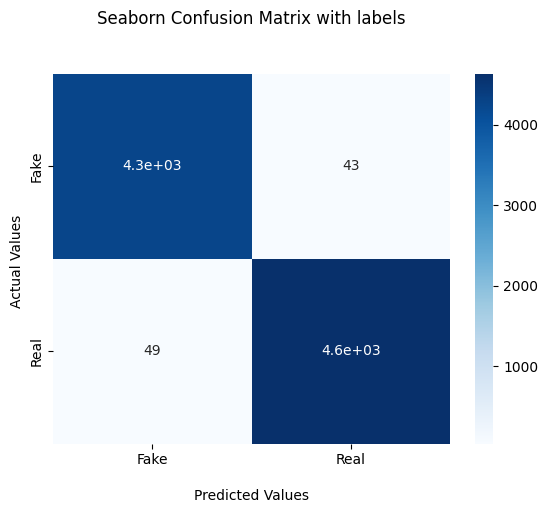

In [ ]:
ax = sns.heatmap(cf_matrix_2, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fake','Real'])
ax.yaxis.set_ticklabels(['Fake','Real'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [ ]:
# Matthews Correlation Coefficient (MCC)
SVC_mcc = matthews_corrcoef(Y_test, X_test_prediction_2)

In [ ]:
SVC_mcc

0.9794753060694237

In [ ]:
matrix_2 = classification_report(Y_test, X_test_prediction_2)
print(matrix_2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4300
           1       0.99      0.99      0.99      4680

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
# Calculate evaluation metrics
tn, fp, fn, tp = confusion_matrix(Y_test, X_test_prediction_2).ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
fnr = fn / (tp + fn)
precision = tp / (tp + fp)
f_measure = 2 * ((precision * tpr) / (precision + tpr))
accuracy = (tp + tn) / (tp + tn + fp + fn)
mcc = ((tp * tn) - (fp * fn)) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

In [ ]:
print("tpr : ",tpr)
print("fpr : ",fpr)
print("fnr : ",fnr)
print("precision: ",precision)
print("f_measure: ",f_measure)
print("accuracy: ",accuracy)
print("mcc: ",mcc)


tpr :  0.9895299145299146
fpr :  0.01
fnr :  0.01047008547008547
precision:  0.9908001711596063
f_measure:  0.9901646354500749
accuracy:  0.9897550111358575
mcc:  0.9794753060694237


Naive Bayes

In [ ]:
# Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X_select,Y, test_size=0.2, random_state=2)


In [ ]:
# Training the Naive Bayes classifier
model_3 = MultinomialNB()
model_3.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
#Model Predict
#Accuracy on test data
X_test_prediction_3 = model_3.predict(X_test)
test_data_accuracy_3 = accuracy_score(X_test_prediction_3, Y_test)
print('Accuracy of test Data: ',test_data_accuracy_3)

Accuracy of test Data:  0.9360801781737194


In [ ]:
X_new = X_test[3]
prediction = model_3.predict(X_new)
print(prediction)

if(prediction[0]== 0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [ ]:
# Printing the confusion matrix
cf_matrix_3 = confusion_matrix(Y_test, X_test_prediction_3)
print(cf_matrix_3)

[[3946  354]
 [ 220 4460]]


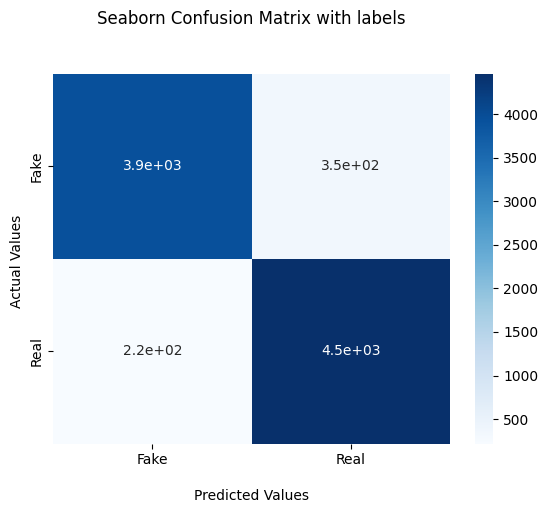

In [ ]:
ax = sns.heatmap(cf_matrix_3, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fake','Real'])
ax.yaxis.set_ticklabels(['Fake','Real'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Matthews Correlation Coefficient (MCC)
Naivebayes_mcc = matthews_corrcoef(Y_test, X_test_prediction_3)

In [ ]:
Naivebayes_mcc

0.8721596689735409

In [ ]:
# Calculate evaluation metrics
tn, fp, fn, tp = confusion_matrix(Y_test, X_test_prediction_3).ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
fnr = fn / (tp + fn)
precision = tp / (tp + fp)
f_measure = 2 * ((precision * tpr) / (precision + tpr))
accuracy = (tp + tn) / (tp + tn + fp + fn)
mcc = ((tp * tn) - (fp * fn)) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

In [ ]:
print("tpr : ",tpr)
print("fpr : ",fpr)
print("fnr : ",fnr)
print("precision: ",precision)
print("f_measure: ",f_measure)
print("accuracy: ",accuracy)
print("mcc: ",mcc)

tpr :  0.9529914529914529
fpr :  0.08232558139534883
fnr :  0.04700854700854701
precision:  0.9264644786040714
f_measure:  0.9395407625868969
accuracy:  0.9360801781737194
mcc:  0.8721596689735409


Random Forest

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_select,Y, test_size=0.2, random_state=2)


In [ ]:
model_4  = RandomForestClassifier()
model_4.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#Model Predict
#Accuracy on test data
X_test_prediction_4 = model_4.predict(X_test)
test_data_accuracy_4 = accuracy_score(X_test_prediction_4, Y_test)
print('Accuracy test data: ',test_data_accuracy_4)

Accuracy test data:  0.9967706013363029


In [ ]:
X_new = X_test[7]
prediction = model_4.predict(X_new)
print(prediction)

if(prediction[0]== 0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [ ]:
cf_matrix_4 = confusion_matrix(Y_test, X_test_prediction_4)

print(cf_matrix_4)

[[4290   10]
 [  19 4661]]


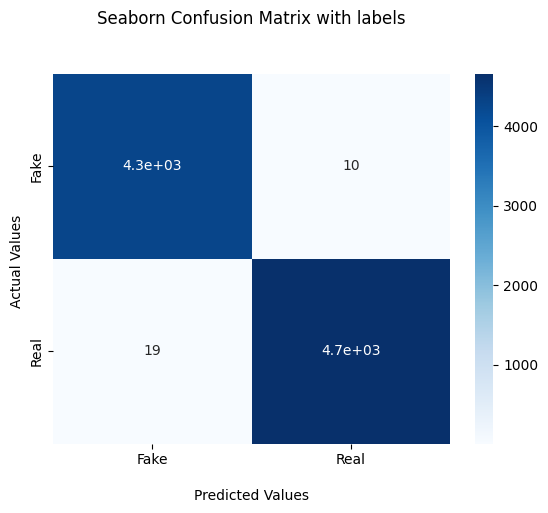

In [ ]:
ax = sns.heatmap(cf_matrix_4, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fake','Real'])
ax.yaxis.set_ticklabels(['Fake','Real'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Matthews Correlation Coefficient (MCC)
Randomforest_mcc = matthews_corrcoef(Y_test, X_test_prediction_4)

In [ ]:
Randomforest_mcc

0.993532168894942

In [ ]:
matrix_4 = classification_report(Y_test, X_test_prediction_4)
print(matrix_4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4300
           1       1.00      1.00      1.00      4680

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
# Calculate evaluation metrics
tn, fp, fn, tp = confusion_matrix(Y_test, X_test_prediction_2).ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
fnr = fn / (tp + fn)
precision = tp / (tp + fp)
f_measure = 2 * ((precision * tpr) / (precision + tpr))
accuracy = (tp + tn) / (tp + tn + fp + fn)
mcc = ((tp * tn) - (fp * fn)) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

In [ ]:
print("tpr : ",tpr)
print("fpr : ",fpr)
print("fnr : ",fnr)
print("precision: ",precision)
print("f_measure: ",f_measure)
print("accuracy: ",accuracy)
print("mcc: ",mcc)

tpr :  0.9895299145299146
fpr :  0.01
fnr :  0.01047008547008547
precision:  0.9908001711596063
f_measure:  0.9901646354500749
accuracy:  0.9897550111358575
mcc:  0.9794753060694237


Comparing the performance of the models

In [ ]:
# list of models
models = [DecisionTreeClassifier(), SVC(kernel='linear'), RandomForestClassifier(),MultinomialNB()]

In [ ]:
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train, Y_train)

    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(Y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)


In [ ]:
compare_models_train_test()

Accuracy score of the  DecisionTreeClassifier()  =  0.995879732739421
Accuracy score of the  SVC(kernel='linear')  =  0.9925389755011136
Accuracy score of the  RandomForestClassifier()  =  0.9977728285077951
Accuracy score of the  MultinomialNB()  =  0.9458797327394209


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

DecisionTree

In [ ]:
cv_score_lr = cross_val_score(DecisionTreeClassifier(), X_select, Y, cv=10, error_score='raise')

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.99487751 0.99710468 0.99665924 0.99643653 0.99710468 0.99510022
 0.99665924 0.99443207 0.99487636 0.99576743]
99.59


Support Vector Machine

In [ ]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), X_select, Y, cv=10,error_score='raise')

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc, 2)

print(mean_accuracy_svc)

[0.99242762 0.9935412  0.99265033 0.99064588 0.99465479 0.99242762
 0.99287305 0.99242762 0.99019826 0.99420806]
99.26


Random Forest

In [ ]:
cv_score_rc = cross_val_score(RandomForestClassifier(), X_select, Y, cv=10,error_score='raise')

print(cv_score_rc)

mean_accuracy_rc = sum(cv_score_rc)/len(cv_score_rc)

mean_accuracy_rc = mean_accuracy_rc*100

mean_accuracy_rc = round(mean_accuracy_rc, 2)

print(mean_accuracy_rc)

[0.99799555 0.99910913 0.99799555 0.99777283 0.99821826 0.99844098
 0.99821826 0.99732739 0.9959902  0.9986634 ]
99.8


Naive Bayes

In [ ]:
cv_score_nb = cross_val_score(MultinomialNB(), X_select, Y, cv=10,error_score='raise')

print(cv_score_nb)

mean_accuracy_nb = sum(cv_score_nb)/len(cv_score_nb)

mean_accuracy_nb = mean_accuracy_nb*100

mean_accuracy_nb = round(mean_accuracy_nb, 2)

print(mean_accuracy_nb)

[0.94788419 0.94187082 0.95211581 0.94454343 0.95055679 0.9454343
 0.94320713 0.94298441 0.93896191 0.94586768]
94.53


To compare the models

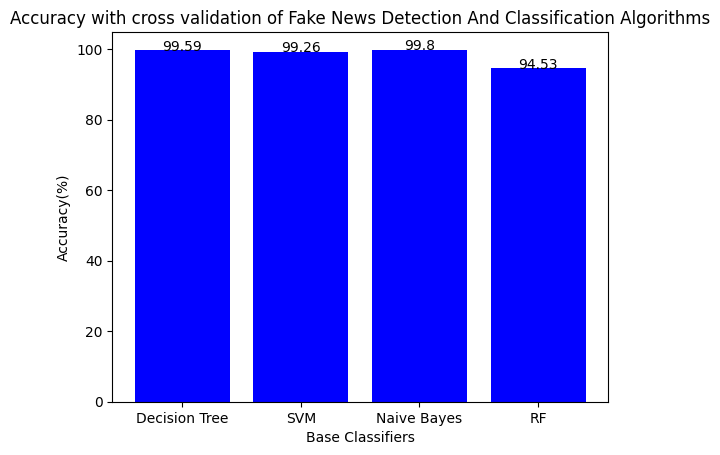

In [ ]:
DT_accuracy = 99.59
SVM_accuracy = 99.28
NB_accuracy = 99.8
RF_accuracy = 94.53


# Create a bar chart
algorithms = ['Decision Tree', 'SVM','Naive Bayes','RF']
accuracy_scores = [DT_accuracy, SVM_accuracy, NB_accuracy,RF_accuracy]
colors = ['blue', 'blue', 'blue','blue']
plt.bar(algorithms, accuracy_scores, color=colors)

plt.title('Accuracy with cross validation of Fake News Detection And Classification Algorithms')
plt.xlabel('Base Classifiers')
plt.ylabel('Accuracy(%)')

# Add text labels showing the accuracy scores
for i, v in enumerate(accuracy_scores):
    plt.text(i, v, str(round(v, 3)), ha='center')

# Show the chart
plt.show()

Ensemble Learning

In [ ]:
dt = DecisionTreeClassifier()
svm = SVC()
nb = MultinomialNB()
rf = RandomForestClassifier()

In [ ]:
ensemble = VotingClassifier(estimators=[('dt', dt), ('svm', svm), ('nb', nb),('rf', rf)], voting='hard')

In [ ]:
ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('svm', SVC()),
                             ('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier())])

In [ ]:
y_pred = ensemble.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)

print('Accuracy of ensemble model: {:.2f}%'.format(accuracy*100))

Accuracy of ensemble model: 99.64%


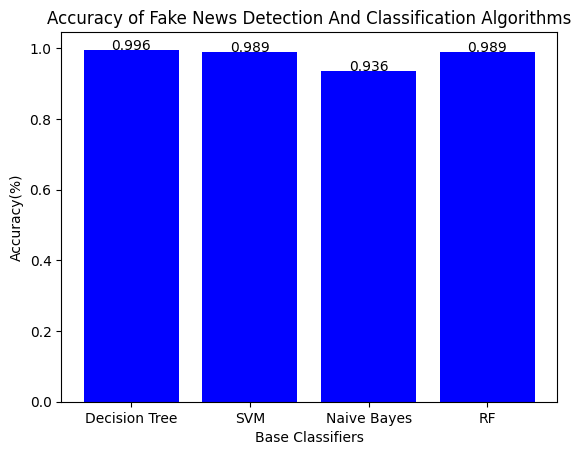

In [ ]:
DT_accuracy = 0.996
SVM_accuracy = 0.989
NB_accuracy = 0.936
RF_accuracy = 0.989


# Create a bar chart
algorithms = ['Decision Tree', 'SVM','Naive Bayes','RF']
accuracy_scores = [DT_accuracy, SVM_accuracy, NB_accuracy,RF_accuracy]
colors = ['blue', 'blue', 'blue','blue']
plt.bar(algorithms, accuracy_scores, color=colors)

plt.title('Accuracy of Fake News Detection And Classification Algorithms')
plt.xlabel('Base Classifiers')
plt.ylabel('Accuracy(%)')

# Add text labels showing the accuracy scores
for i, v in enumerate(accuracy_scores):
    plt.text(i, v, str(round(v, 6)), ha='center')

# Show the chart
plt.show()